# Use yfinance to analyse stock market

In this tutorial, we will use yfinance to analyse stock.

In [1]:
import pandas as pd
import yfinance as yf
import datetime

## 1. Know the basics of a stock

The objective is to get the basic information about a stock


In [2]:
alo = "ALO.PA"
scor = "SCR.PA"
axa = "CS.PA"
sg="GLE.PA"

In [3]:
alo_stock = yf.Ticker(alo)

# stock.info returns a dict which contains many useful information

for key, value in alo_stock.info.items():
    print(f"{key}: {value}")

address1: 48, rue Albert Dhalenne
city: Saint-Ouen
zip: 93400
country: France
phone: 33 1 57 06 90 00
website: https://www.alstom.com/
industry: Railroads
industryKey: railroads
industryDisp: Railroads
sector: Industrials
sectorKey: industrials
sectorDisp: Industrials
longBusinessSummary: Alstom SA provides solutions for rail transport industry in Europe, the Americas, Asia and Pacific, the Middle East, Central Asia, and Africa. The company offers rolling stock solutions comprising people movers and monorails, light rails, metros, commuter trains, regional trains, high-speed trains, and locomotives; asset optimization, cybersecurity, connectivity, digital passenger, and security and city mobility solutions; and signaling products, such as urban, mainline, and freight and mining signaling. It also provides APM, monorail, tram, metro, and main line systems; and tracklaying and track solutions, catenary free and ground feeding solutions, electrification solutions, and electromechanical eq

In [5]:
# get some fundamental info

fundamentals = ["dividendYield", "marketCap", "beta", "forwardPE"]
for key in fundamentals:
    print(f"{key} : {alo_stock.info.get(key)}")

dividendYield : None
marketCap : 9057153024
beta : None
forwardPE : 9.630012


## Basic explanation of these properties

0. **Earnings per share (EPS)**: is a company's net income subtracted by preferred dividends and then divided by the number of common shares it has outstanding. EPS indicates how much money a company makes for each share of its stock and is a widely used metric for estimating corporate value. 

1. **payout ratio**: 

It is the percentage of a company's earnings that is paid out to shareholders in the form of dividends. It is a key metric for investors to assess how much of a company's profits are being returned to shareholders versus being reinvested into the business.
Interpretation:

- Low Payout Ratio (e.g., <30%) → The company is reinvesting most of its earnings, which may indicate growth potential.
- Moderate Payout Ratio (30%-60%) → A balance between returning money to shareholders and reinvesting in the business.
- High Payout Ratio (60%-100%) → The company is paying out most or all of its earnings as dividends, which may indicate limited reinvestment opportunities.

2. **Dividend Rate**: The total annual dividend payment per share of a stock. If a company pays a `quarterly dividend of $0.50, the dividend rate is $2`.
3. **Dividend Yield**: The percentage return a shareholder gets from dividends relative to the stock price. `If a stock price is $50 and pays a $2 dividend per year, then the yield is (2/50)*100 = 4%`. **High yield can be attractive but may signal risk if unsustainable.**
4. **Trailing P/E**: Stock Price divide by the last 12 months earnings per share (EPS). `If the stock price is $100 and EPS for the past year was $5, 100/5 = 20 (P/E ratio)`. **A high P/E suggests the stock is expensive relative to past earnings, while a low P/E may indicate an undervalued stock.**
5. **Forward P/E**: Stock Price divide by the estimated next 12 months earnings per share (EPS). **If forward P/E is lower than trailing P/E, earnings are expected to grow. If it’s higher, earnings are expected to decline.**

In [25]:
### 1.2 Get info many stocks

stock_list=["MC"]

In [26]:
from typing import List


def get_stock_infos(stock_tickers:List[str])->pd.DataFrame:
    """
    This function takes a list of stock tickers and returns a Pandas DataFrame which contains the basic information of the stock.
    The stock ticker has the following format: <stock_id>.PA. For example: ALO.PA: Alstom, MC.PA: LVMH
    :param stock_tickers: 
    :return: 
    """
    # We don't need all information of a stock, below is a list of all important columns for me.
    key_columns = ["symbol", "industry", "sector", "longBusinessSummary","fullTimeEmployees","auditRisk","boardRisk","compensationRisk","shareHolderRightsRisk","overallRisk", "dividendRate","dividendYield",
                   "payoutRatio","fiveYearAvgDividendYield", "enterpriseValue", "fiftyTwoWeekLow", "fiftyTwoWeekHigh","fiftyDayAverage","lastDividendValue","lastDividendDate","totalDebt","freeCashflow",
                   "operatingCashflow","earningsGrowth", "revenueGrowth", "grossMargins"]
    stock_infos:List[dict] = []

    # add stock dict into a list
    for stock_ticker in stock_tickers:
        full_name = f"{stock_ticker}.PA"
        stock_infos.append(yf.Ticker(full_name).info)
    # convert the list of dict into pandas dataframe, then filter only the column that interest me
    pdf = pd.DataFrame(stock_infos)[key_columns]
    # use symbol column as index
    pdf.set_index("symbol", inplace=True)
    return pdf
    

# Basic information of a stock




In [27]:
# create a df
df= get_stock_infos(stock_list)
df.head()

,industry,sector,longBusinessSummary,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,dividendRate,...,fiftyTwoWeekHigh,fiftyDayAverage,lastDividendValue,lastDividendDate,totalDebt,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins
symbol,,,,,,,,,,,,,,,,,,,,,
MC.PA,Luxury Goods,Consumer Cyclical,"LVMH Moët Hennessy - Louis Vuitton, Société Eu...",192287,4,8,10,7,9,13.0,...,886.4,653.336,5.5,1733097600,40851001344,9772125184,18933999616,-0.141,-0.013,0.68528


In [24]:
for col in df.columns:
    print(col)

industry
sector
longBusinessSummary
fullTimeEmployees
auditRisk
boardRisk
compensationRisk
shareHolderRightsRisk
overallRisk
dividendRate
dividendYield
payoutRatio
fiveYearAvgDividendYield
enterpriseValue
fiftyTwoWeekLow
fiftyTwoWeekHigh
fiftyDayAverage
lastDividendValue
lastDividendDate
totalDebt
freeCashflow
operatingCashflow
earningsGrowth
revenueGrowth
grossMargins


In [53]:
# filter the fundamental columns
df =df[fundamentals]
df.head()

,dividendYield,marketCap,beta,forwardPE
symbol,,,,
ALO.PA,0.0096,9928229888,1.028009,12.560387
CS.PA,0.0604,63327576064,1.329295,7.679945
SCR.PA,0.0485,5143068672,1.253974,6.200431
GLE.PA,0.0665,20525211648,1.577214,4.716391


<BarContainer object of 4 artists>

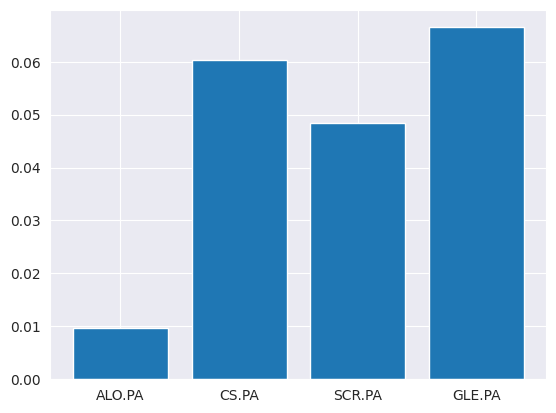

In [54]:
from matplotlib import pyplot as plt

plt.bar(df.index,df.dividendYield)

In [55]:
# get the best dividend yield stock
df["dividendYield"].nlargest(2)

symbol
GLE.PA    0.0665
CS.PA     0.0604
Name: dividendYield, dtype: float64

## Get historical trade information

As we know, stock price and dividend change all the time.

In [34]:

df2 = yf.download(alo,start="2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [35]:
df2.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,42.270000,42.790001,42.240002,42.580002,41.451309,351895
2020-01-03,42.220001,42.639999,42.209999,42.639999,41.509720,337753
2020-01-06,42.439999,42.590000,41.849998,42.220001,41.100857,449260
2020-01-07,42.230000,42.720001,42.200001,42.500000,41.373432,411762
2020-01-08,43.119999,43.560001,43.000000,43.310001,42.161961,765403
2020-01-09,43.599998,43.720001,42.980000,43.169998,42.025669,578042
2020-01-10,43.230000,43.480000,43.060001,43.090000,41.947792,466355
2020-01-13,43.279999,43.939999,43.099998,43.549999,42.395596,672950
2020-01-14,43.590000,44.139999,43.290001,44.040001,42.872608,647802


In [36]:
df2.shape

(928, 6)

In [38]:
alo_div = alo_stock.dividends
print(f"dividend {alo_div}")

dividend Date
2006-05-15 00:00:00+02:00    0.226018
2007-07-05 00:00:00+02:00    0.370902
2008-06-26 00:00:00+02:00    0.741804
2009-06-25 00:00:00+02:00    1.038526
2010-06-24 00:00:00+02:00    1.149796
2011-06-30 00:00:00+02:00    0.574898
2012-06-28 00:00:00+02:00    0.741804
2013-07-04 00:00:00+02:00    0.778894
2017-07-07 00:00:00+02:00    0.231814
2018-07-20 00:00:00+02:00    0.324539
2019-07-15 00:00:00+02:00    5.099902
2021-08-02 00:00:00+02:00    0.250000
2022-07-20 00:00:00+02:00    0.250000
2023-07-17 00:00:00+02:00    0.250000
Name: Dividends, dtype: float64


In [40]:
# we need a function which calculate the actual dividendYield
def getDividendYield(stockTicker:str, currentYear:int=None):
    stock = yf.Ticker(stockTicker)
    if not currentYear:
        currentYear=datetime.datetime.now().year

    currentDiv = stock.dividends[stock.dividends.index.year == currentYear][0]
    currentPrice = stock.history(period="1d")["Close"][0]
    divYield = currentDiv / currentPrice
    print(f"The dividendYield of {stockTicker} at year {currentYear} is: {divYield}")


In [41]:
getDividendYield(axa)

The dividendYield of CS.PA at year 2023 is: 0.06081201948272541


In [42]:
getDividendYield("OR.PA")

The dividendYield of OR.PA at year 2023 is: 0.01444043321299639


In [43]:
getDividendYield("SCR.PA")

The dividendYield of SCR.PA at year 2023 is: 0.048661799712353


In [45]:
def aroundDateToWeekDay(inDate: datetime.datetime) -> datetime.datetime:
    """
    This function takes a date, if it's not a week day, convert it to the nearest week day date
    :param inDate:
    :type inDate:
    :return:
    :rtype:
    """
    dayOfWeek = inDate.weekday()
    # 0~4 is week day, 5,6 are saturday and sunday
    if dayOfWeek == 5:
        return inDate - datetime.timedelta(days=1)
    elif dayOfWeek == 6:
        return inDate - datetime.timedelta(days=2)
    else:
        return inDate


def getPriceOfDate(stock, inDate: datetime.datetime) -> float:
    """
    This function takes a stock, and a date, returns the closing price of the stock at the given day
    :param stock:
    :type stock:
    :param inDate:
    :type inDate:
    :return:
    :rtype:
    """
    price = stock.history(start=inDate, end=inDate + datetime.timedelta(days=1))
    if price.empty:
        getPriceOfDate(stock, inDate - datetime.timedelta(days=1))
    else:
        return price


def getHistoricalReturns(oldPrice: float, newPrice: float) -> float:
    """
    This function returns the historical returns of two giving price.
    :param oldPrice:
    :type oldPrice:
    :param newPrice:
    :type newPrice:
    :return:
    :rtype:
    """
    return (newPrice - oldPrice) / oldPrice * 100


def processDate(dateArg) -> datetime.date:
    """
    Convert a date argument into datetime.date type, which can be either a string or a datetime object.
    :param dateArg:
    :type dateArg:
    :return:
    :rtype:
    """

    if isinstance(dateArg, str):
        try:
            # Attempt to convert string to datetime
            processedDate = datetime.datetime.strptime(dateArg, '%Y-%m-%d').date()
        except ValueError:
            raise ValueError("Invalid date string format. Please use 'YYYY-MM-DD'.")
    elif isinstance(dateArg, datetime.date):
        processedDate = dateArg
    else:
        raise ValueError("Invalid date argument. Please provide a string or datetime object.")

    return processedDate


def getPriceEvolution(stockTicker: str, startDate, endDate=None) -> float:
    """
    This function takes a stock ticker, and two dates, then it shows the price evolution of the stock. It returns
    only the HistoricalReturns of the stock
    :param stockTicker:
    :type stockTicker:
    :param startDate:
    :type startDate:
    :param endDate:
    :type endDate:
    :return:
    :rtype:
    """
    # get the stock
    stock = yf.Ticker(stockTicker)
    # convert the start date (str or datetime) to datetime
    startDate = processDate(startDate)
    # convert the date to a weekday (if the date is a saturday or sunday)
    startDate = aroundDateToWeekDay(startDate)

    # if end date is none
    if not endDate:
        endDate = datetime.datetime.now().date()
    else:
        endDate = processDate(endDate)
    endDate = aroundDateToWeekDay(endDate)

    oldPrice = getPriceOfDate(stock, startDate)['Close'][0]
    newPrice = getPriceOfDate(stock, endDate)['Close'][0]
    print(f"old price: {oldPrice}, at {startDate}")
    print(f"new price: {newPrice}, at {endDate}")
    hr = getHistoricalReturns(oldPrice, newPrice)
    print(f"historical returns: {hr}")
    return hr


def getStockReturnsSinceDays(stockTicker: str, days: int):
    endDate = datetime.datetime.now().date()
    startDate = endDate - datetime.timedelta(days=days)
    getPriceEvolution(stockTicker, startDate, endDate)


def getLastWeekReturns(stockTicker: str):
    getStockReturnsSinceDays(stockTicker, 7)


def getLastMonthReturns(stockTicker: str):
    getStockReturnsSinceDays(stockTicker, 30)


def getLastThreeMonthReturns(stockTicker: str):
    getStockReturnsSinceDays(stockTicker, 90)


def getLastYearReturns(stockTicker: str):
    getStockReturnsSinceDays(stockTicker, 365)

In [46]:
startDate="2022-06-04"
endDate = "2023-06-04"
getPriceEvolution("SCR.PA",startDate, endDate)

old price: 22.98912239074707, at 2022-06-03
new price: 24.6299991607666, at 2023-06-02
historical returns: 7.137622490017151


7.137622490017151

In [47]:


getLastWeekReturns(axa)
getLastMonthReturns(axa)
getLastThreeMonthReturns(axa)
getLastYearReturns(axa)

CS.PA: No price data found, symbol may be delisted (1d 2023-08-07 -> 2023-08-08)
CS.PA: No price data found, symbol may be delisted (1d 2023-08-06 -> 2023-08-07)
CS.PA: No price data found, symbol may be delisted (1d 2023-08-05 -> 2023-08-06)


TypeError: 'NoneType' object is not subscriptable

In [48]:


getLastWeekReturns(scor)
getLastMonthReturns(scor)
getLastThreeMonthReturns(scor)
getLastYearReturns(scor)

SCR.PA: No price data found, symbol may be delisted (1d 2023-08-07 -> 2023-08-08)
SCR.PA: No price data found, symbol may be delisted (1d 2023-08-06 -> 2023-08-07)
SCR.PA: No price data found, symbol may be delisted (1d 2023-08-05 -> 2023-08-06)


TypeError: 'NoneType' object is not subscriptable

In [73]:
getDividendYield(axa)

The dividendYield of CS.PA at year 2023 is: 0.06010252816584472


In [49]:
getPriceEvolution(sg, "2020-06-16")

old price: 12.653295516967773, at 2020-06-16
new price: 25.610000610351562, at 2023-08-14
historical returns: 102.39786999370362


102.39786999370362

In [50]:
getDividendYield(sg)

The dividendYield of GLE.PA at year 2023 is: 0.06638031860541463
